hello


In [3]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
df = pd.read_csv (r'C:\Users\Malik\Downloads\movies.csv')
#pd.options.mode.chained_assignment = None


In [19]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Let's see if there is any missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [66]:
# Data types for our columns 
df.dtypes

name              int16
rating             int8
genre              int8
year              int64
released          int16
score           float64
votes           float64
director          int16
writer            int16
star              int16
country            int8
budget            int64
gross             int64
company           int16
runtime         float64
yearcorrect      object
dtype: object

In [67]:
 # remove rows with NaN in these cols
df = df.dropna(subset=['budget', 'gross']) 

#Change data types of columns 
df['budget'] = df['budget'].astype('int64')
df['gross']  = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# Create correct year column 
df['yearcorrect '] = df['released'].astype(str).str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,Octo
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,Febr
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,Apri
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,Octo


In [60]:
df = df.sort_values(by=['gross'],inplace= False, ascending= False)

In [54]:
pd.set_option('display.max_rows',None )

In [57]:
# Drop any Duplicates 
df['company'].drop_duplicates().sort_values(ascending =False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [58]:
# Budget High Correlation 
# Company High Correlation 


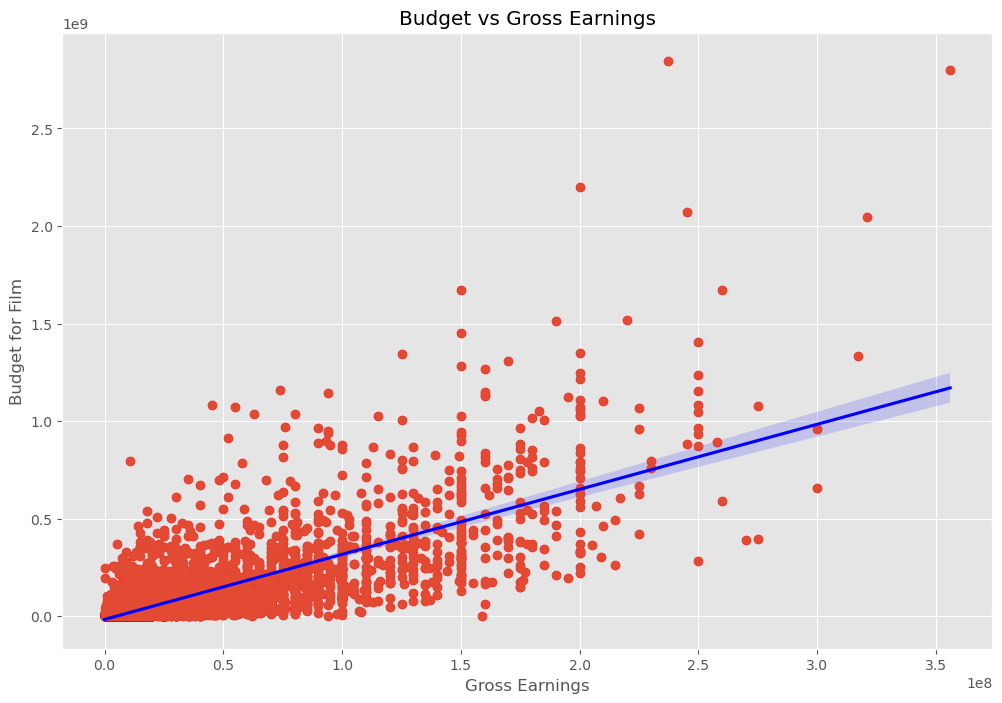

In [17]:
#Scatter Plot with budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [7]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July


In [21]:
# Plot Budget Vs Gross using seaborn 
sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"Red"},line_kws={"color":"blue"})

<Axes: xlabel='budget', ylabel='gross'>

In [30]:
# Let's Start Looking at Coorelation 
df.corr(numeric_only=True, method ='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.102346,0.226895,0.314842,0.264716,0.120676
score,0.102346,1.000000,0.411931,0.056781,0.188259,0.400574
votes,0.226895,0.411931,1.000000,0.485301,0.632987,0.309366
budget,0.314842,0.056781,0.485301,1.000000,0.750562,0.270042
gross,0.264716,0.188259,0.632987,0.750562,1.000000,0.244942
runtime,0.120676,0.400574,0.309366,0.270042,0.244942,1.000000


In [31]:
# High Correlation  between budget and gross


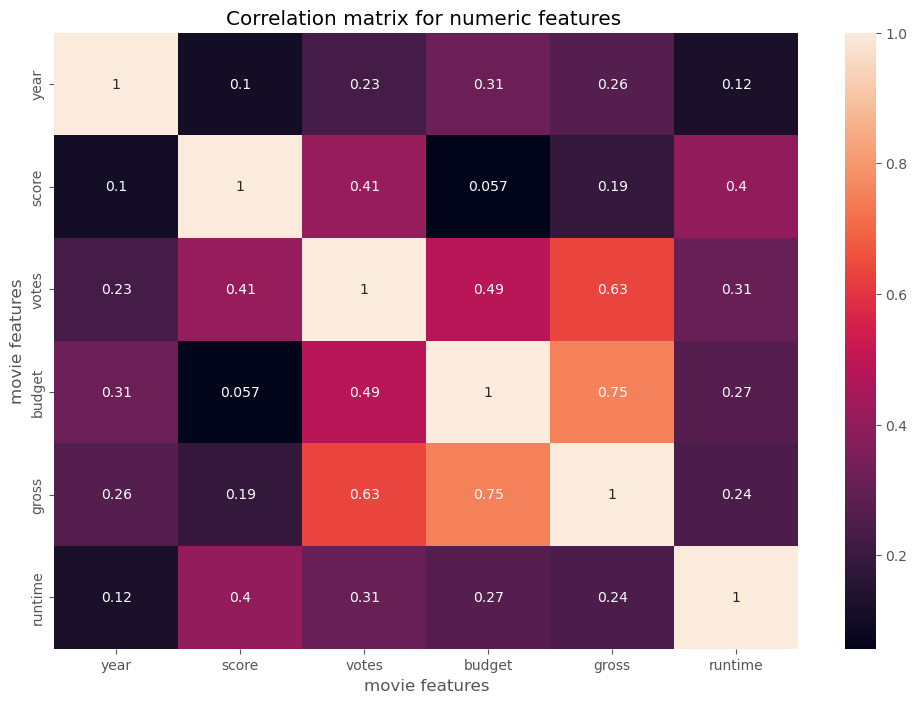

In [35]:
Correlation_matrix =df.corr(numeric_only=True, method ='pearson')
sns.heatmap(Correlation_matrix,annot=True)
plt.title('Correlation matrix for numeric features ')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()


In [36]:
# Looks at Compant 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [56]:
df_numerized = df

for col_name in df_numerized.columns : 
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6506,6,6,1980,1685,8.4,927000.0,2544,3958,1022,54,19000000,46998772,2273,146.0
1,5498,6,1,1980,1472,5.8,65000.0,2233,1612,316,55,4500000,58853106,710,104.0
2,5073,4,0,1980,1751,8.7,1200000.0,1093,2534,1708,55,18000000,538375067,1505,124.0
3,282,4,4,1980,1472,7.7,221000.0,1279,1975,2197,55,3500000,83453539,1769,88.0
4,1016,6,4,1980,1523,7.3,108000.0,1037,511,398,55,6000000,39846344,1736,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,5713,3,0,2020,490,6.8,3700.0,1076,1652,2747,8,80000000,461421559,360,149.0
7653,6399,6,5,2020,91,5.4,2400.0,2475,3827,2385,55,0,3661,1860,98.0
7656,6936,5,4,2020,1865,5.0,294.0,2470,3820,2326,55,0,413378,1862,120.0
7658,789,6,6,2020,1091,6.6,35.0,1739,1051,515,55,5000,0,1709,78.0


In [57]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6506,6,6,1980,1685,8.4,927000.0,2544,3958,1022,54,19000000,46998772,2273,146.0
1,5498,6,1,1980,1472,5.8,65000.0,2233,1612,316,55,4500000,58853106,710,104.0
2,5073,4,0,1980,1751,8.7,1200000.0,1093,2534,1708,55,18000000,538375067,1505,124.0
3,282,4,4,1980,1472,7.7,221000.0,1279,1975,2197,55,3500000,83453539,1769,88.0
4,1016,6,4,1980,1523,7.3,108000.0,1037,511,398,55,6000000,39846344,1736,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,5713,3,0,2020,490,6.8,3700.0,1076,1652,2747,8,80000000,461421559,360,149.0
7653,6399,6,5,2020,91,5.4,2400.0,2475,3827,2385,55,0,3661,1860,98.0
7656,6936,5,4,2020,1865,5.0,294.0,2470,3820,2326,55,0,413378,1862,120.0
7658,789,6,6,2020,1091,6.6,35.0,1739,1051,515,55,5000,0,1709,78.0


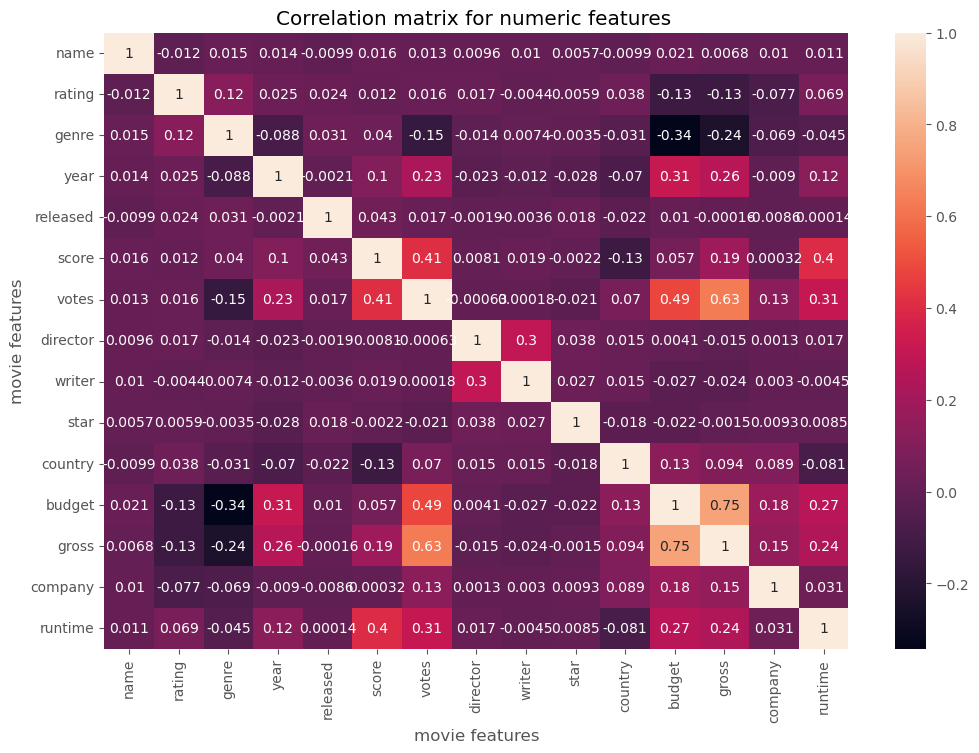

In [58]:
Correlation_matrix =df_numerized.corr(numeric_only=True, method ='pearson')
sns.heatmap(Correlation_matrix,annot=True)
plt.title('Correlation matrix for numeric features ')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [59]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011924,0.015300,0.013514,-0.009906,0.016181,0.013180,0.009608,0.010217,0.005685,-0.009939,0.020825,0.006817,0.010073,0.011151
rating,-0.011924,1.000000,0.117566,0.024989,0.024319,0.011538,0.016086,0.017205,-0.004387,0.005905,0.037738,-0.126806,-0.128910,-0.076807,0.069089
genre,0.015300,0.117566,1.000000,-0.088172,0.030625,0.040090,-0.148420,-0.013508,0.007351,-0.003525,-0.031485,-0.342064,-0.240903,-0.068678,-0.044631
year,0.013514,0.024989,-0.088172,1.000000,-0.002088,0.102346,0.226895,-0.022765,-0.012318,-0.027691,-0.070266,0.314842,0.264716,-0.009026,0.120676
released,-0.009906,0.024319,0.030625,-0.002088,1.000000,0.043175,0.016877,-0.001868,-0.003569,0.018026,-0.022109,0.009995,-0.000164,-0.008570,0.000145
score,0.016181,0.011538,0.040090,0.102346,0.043175,1.000000,0.411931,0.008071,0.019084,-0.002193,-0.130094,0.056781,0.188259,0.000316,0.400574
votes,0.013180,0.016086,-0.148420,0.226895,0.016877,0.411931,1.000000,-0.000627,0.000177,-0.020977,0.069582,0.485301,0.632987,0.129596,0.309366
director,0.009608,0.017205,-0.013508,-0.022765,-0.001868,0.008071,-0.000627,1.000000,0.297479,0.037570,0.015245,0.004140,-0.015027,0.001337,0.017386
writer,0.010217,-0.004387,0.007351,-0.012318,-0.003569,0.019084,0.000177,0.297479,1.000000,0.026584,0.014937,-0.027145,-0.023834,0.003035,-0.004526
star,0.005685,0.005905,-0.003525,-0.027691,0.018026,-0.002193,-0.020977,0.037570,0.026584,1.000000,-0.017626,-0.021930,-0.001470,0.009317,0.008474


In [60]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.011924
         genre       0.015300
         year        0.013514
         released   -0.009906
                       ...   
runtime  country    -0.081464
         budget      0.270042
         gross       0.244942
         company     0.030941
         runtime     1.000000
Length: 225, dtype: float64

In [71]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre    budget    -0.342064
budget   genre     -0.342064
genre    gross     -0.240903
gross    genre     -0.240903
genre    votes     -0.148420
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [70]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.632987
votes     gross       0.632987
budget    gross       0.750562
gross     budget      0.750562
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Budget And gross have the highest correlation to gross earnings 
# Company has low corrlation  